In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

Task 1: Data Preparation

In [ ]:
df = pd.read_csv('/content/heart_disease_12.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [ ]:
df['sex'].value_counts()

,count
sex,
Male,718
Female,190


In [ ]:
df['cp'].value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


In [ ]:
df['fbs'].value_counts()

,count
fbs,
False,723
True,185


In [ ]:
df['restecg'].value_counts()

,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


In [ ]:
df['exang'].value_counts()

,count
exang,
FALSE,535
TRUE,337
TURE,36


In [ ]:
df['slope'].value_counts()

,count
slope,
flat,453
upsloping,298
downsloping,157


In [ ]:
df['thal'].value_counts()

,count
thal,
reversable defect,362
normal,353
fixed defect,193


In [ ]:
df.shape

(908, 13)

Task 2: Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


<Figure size 2000x1500 with 0 Axes>

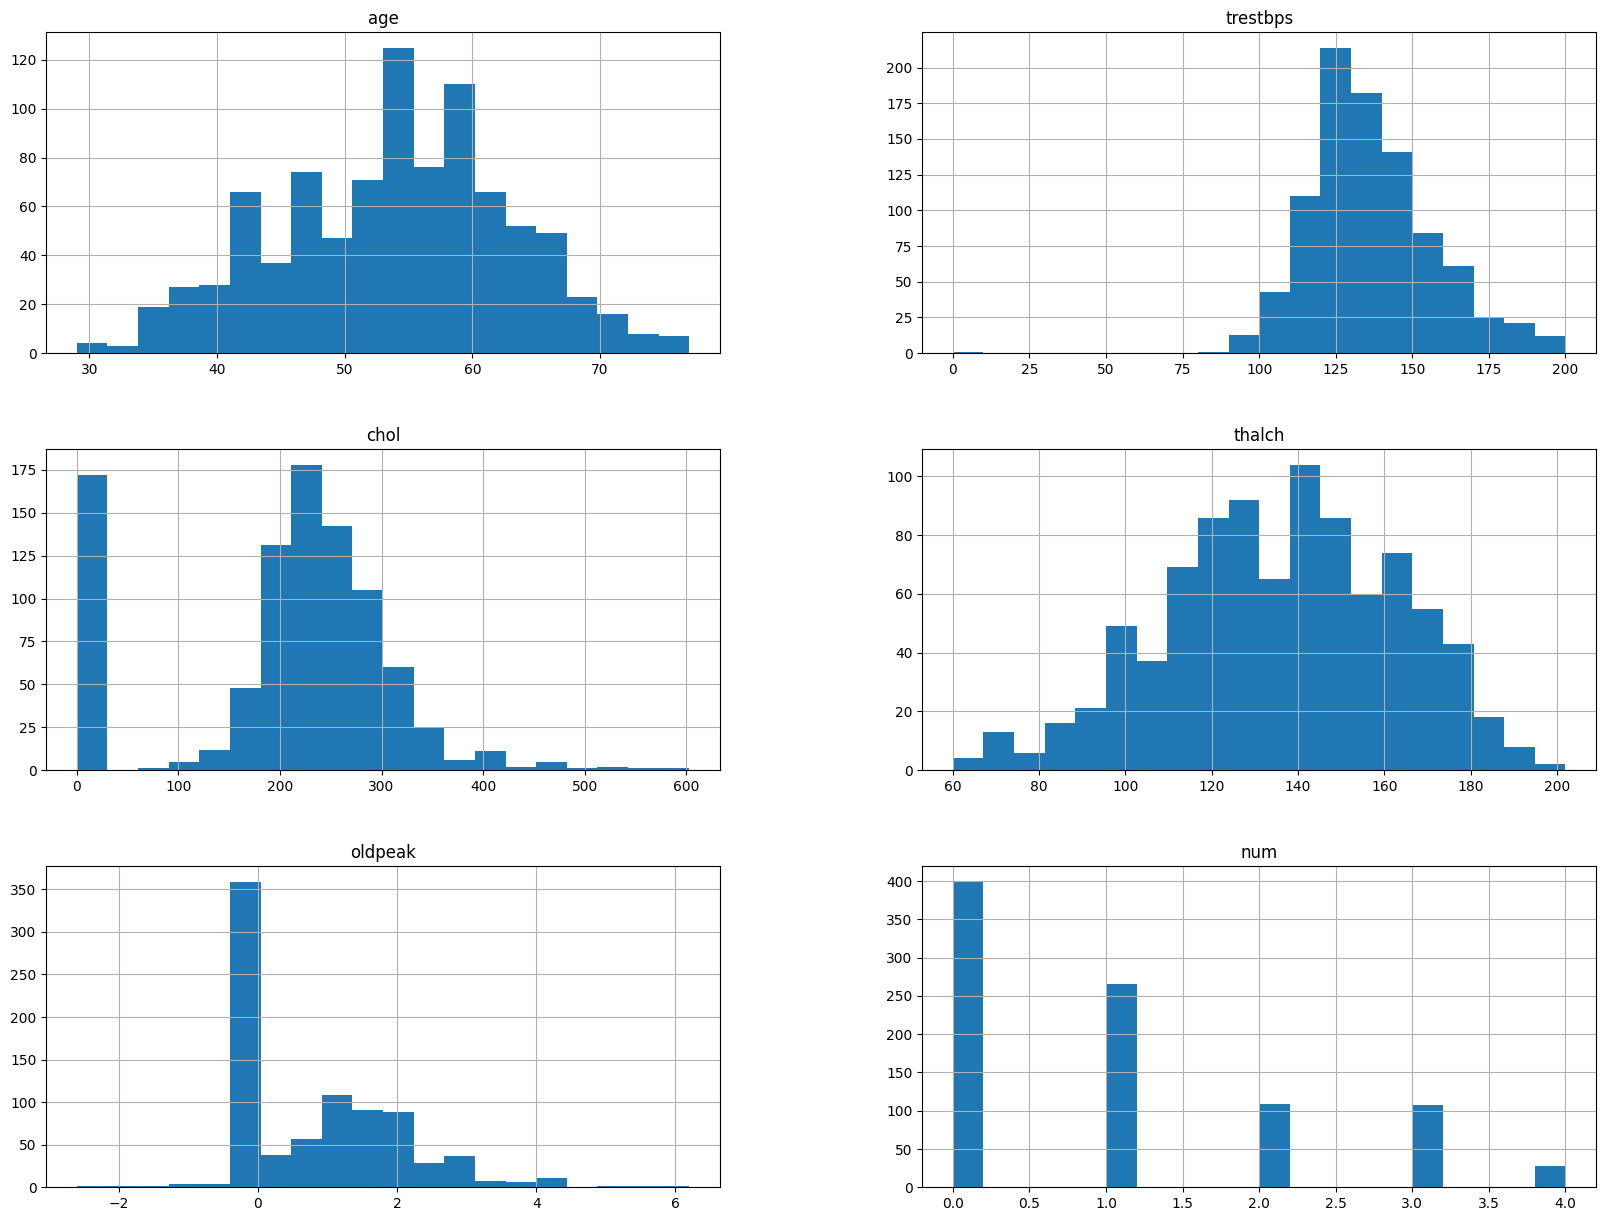

In [ ]:
# Visualize the distribution of features
plt.figure(figsize=(20, 15))
df.hist(bins=20, figsize=(20, 15))
plt.show()

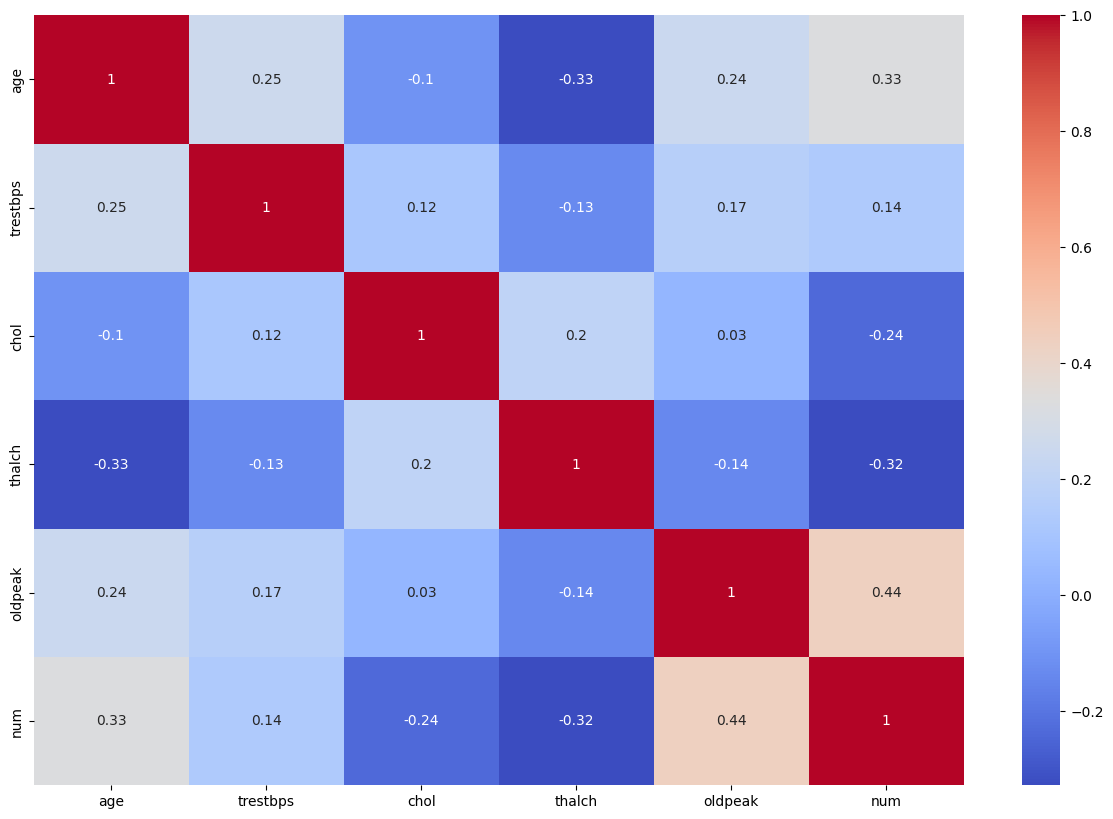

In [ ]:
# Check for correlations
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Task 3: Feature Engineering

In [ ]:
#Complete Iris dataset. Since Y variable is categorical convert it to numerical using LabelEncoder
# If Independent variable would have been categorical we would have used one hot encoding.
label_encoder = preprocessing.LabelEncoder()

# Apply LabelEncoder to each column separately
for column in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,1,4
904,62,1,0,166,170,0,2,120,1,3.0,1,0,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,0,4


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

In [ ]:
# One-hot encode the genres
mlb = MultiLabelBinarizer()
df_encoded = mlb.fit_transform(df)

In [ ]:
# Normalize the average rating
numerical_df = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = MinMaxScaler()
df[numerical_df] = scaler.fit_transform(df[numerical_df])

Task 4: Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
x=df.iloc[:,0:12]
y=df['num']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.708333,1,3,0.725,0.386401,1,0,0.633803,0,0.556818,0,0
1,0.250000,1,1,0.675,0.336650,0,1,0.507042,0,0.295455,1,0
2,0.583333,1,0,0.700,0.318408,0,1,0.619718,0,0.340909,1,0
3,0.479167,1,3,0.590,0.308458,0,0,0.915493,0,0.295455,1,0
4,0.583333,1,0,0.550,0.333333,0,1,0.464789,1,0.465909,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1,0,0.625,0.000000,0,1,0.422535,0,0.465909,2,1
904,0.687500,1,0,0.830,0.281924,0,2,0.422535,1,0.636364,1,0
905,0.562500,1,2,0.850,0.000000,0,0,0.443662,1,0.579545,0,1
906,0.562500,1,2,0.720,0.344942,1,2,0.316901,2,NaN,0,0


In [ ]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [ ]:
# Splitting data into training and testing data set.
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.38112745098039214, 0.9615384615384616, 'x[2] <= 0.5\nentropy = 1.938\nsamples = 726\nvalue = [310, 217, 87, 90, 22]'),
 Text(0.36151960784313725, 0.8846153846153846, 'x[9] <= 0.494\nentropy = 2.081\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.12745098039215685, 0.8076923076923077, 'x[8] <= 0.5\nentropy = 1.922\nsamples = 265\nvalue = [73, 115, 41, 31, 5]'),
 Text(0.10784313725490197, 0.7307692307692307, 'x[4] <= 0.07\nentropy = 1.96\nsamples = 134\nvalue = [56, 44, 22, 9, 3]'),
 Text(0.0392156862745098, 0.6538461538461539, 'x[7] <= 0.317\nentropy = 1.916\nsamples = 42\nvalue = [3, 19, 12, 6, 2]'),
 Text(0.0196078431372549, 0.5769230769230769, 'entropy = 0.686\nsamples = 8\nvalue = [0, 2, 1, 3, 2]'),
 Text(0.058823529411764705, 0.5769230769230769, 'x[1] <= 0.5\nentropy = 2.079\nsamples = 34\nvalue = [3, 17, 11, 3, 0]'),
 Text(0.0392156862745098, 0.5, 'entropy = -4.081\nsamples = 3\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.0784313725490196, 0.5, 'x[7] <= 0.335\nentropy = 2.

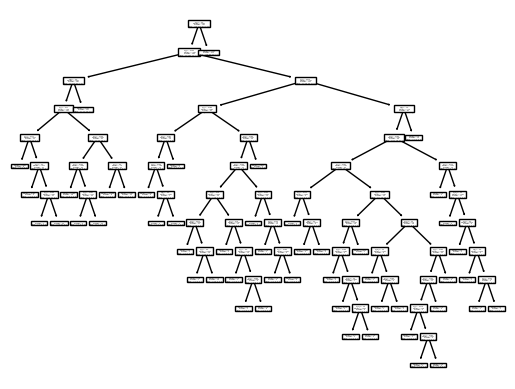

In [ ]:
#PLot the decision tree
tree.plot_tree(model)

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,118
1,45
3,9
2,8
4,2


In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4
num,,,,,
0,81,7,1,0,0
1,22,20,2,4,0
2,6,10,3,2,1
3,7,6,0,3,1
4,2,2,2,0,0


In [ ]:
# performance matrix
print(accuracy_score(y_test, preds))

0.5879120879120879


In [ ]:
print(confusion_matrix(y_test,preds))

[[81  7  1  0  0]
 [22 20  2  4  0]
 [ 6 10  3  2  1]
 [ 7  6  0  3  1]
 [ 2  2  2  0  0]]


Task 5: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [ ]:
# Predict and evaluate the tuned model
y_pred_best = best_model.predict(x_test)
accuracy_score = accuracy_score(y_test, y_pred_best)

In [ ]:
tree_model = DecisionTreeClassifier(criterion='log_loss',max_depth = 2,max_features = None,splitter ='best')

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\nlog_loss = 1.938\nsamples = 726\nvalue = [310, 217, 87, 90, 22]'),
 Text(0.25, 0.5, 'x[9] <= 0.494\nlog_loss = 2.07\nsamples = 408\nvalue = [86, 163, 71, 70, 18]'),
 Text(0.125, 0.16666666666666666, 'log_loss = 1.922\nsamples = 265\nvalue = [73, 115, 41, 31, 5]'),
 Text(0.375, 0.16666666666666666, 'log_loss = 2.142\nsamples = 143\nvalue = [13, 48, 30, 39, 13]'),
 Text(0.75, 0.5, 'x[8] <= 0.5\nlog_loss = 1.344\nsamples = 318\nvalue = [224, 54, 16, 20, 4]'),
 Text(0.625, 0.16666666666666666, 'log_loss = 1.165\nsamples = 257\nvalue = [199, 36, 9, 11, 2]'),
 Text(0.875, 0.16666666666666666, 'log_loss = 2.079\nsamples = 61\nvalue = [25, 18, 7, 9, 2]')]

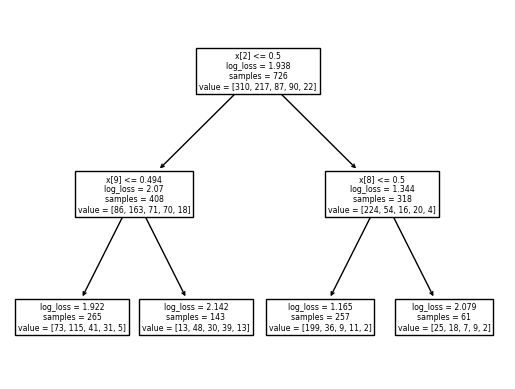

In [ ]:
#PLot the decision tree
tree.plot_tree(tree_model)

In [ ]:
accuracy_score

0.6043956043956044

Task 6: Model Evaluation and Analysis

In [ ]:
# Analyze important features
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f + 1}. feature {x.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature oldpeak (nan)
2. feature cp (0.10769813750121705)
3. feature exang (0.01716912469670441)
4. feature chol (0.0162538916826452)
5. feature trestbps (0.007930479435406429)
6. feature thalch (0.007284710829549596)
7. feature age (0.006522622800513383)
8. feature sex (0.0022344658708295076)
9. feature thal (0.00022956841138659483)
10. feature slope (0.0)
11. feature restecg (0.0)
12. feature fbs (0.0)


Hyperparameter tuning led to a modest improvement in the model's accuracy

Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans:-

Common Hyperparameters of Decision Tree Models

Maximum Depth: Controls tree complexity; deeper trees can overfit.

Minimum Samples Split: Minimum samples required to split a node; higher values prevent overfitting.

Minimum Samples Leaf: Minimum samples per leaf node; higher values reduce overfitting.

Maximum Features: Number of features to consider for splits; affects model diversity and performance.

Maximum Leaf Nodes: Limits the number of leaf nodes; simpler trees are less likely to overfit.

Minimum Impurity Decrease: Minimum decrease in impurity required for a split; controls split complexity.

Criterion: Measures split quality (e.g., Gini impurity, entropy); affects tree structure.


2. What is the difference between the Label encoding and One-hot encoding?

Ans:-

1. Label Encoding

Description: Converts categorical values into numerical values by assigning a unique integer to each category.

Example: For categories ['Red', 'Green', 'Blue'], label encoding would assign 0 to Red, 1 to Green, and 2 to Blue.

Use Case: Suitable for ordinal categories where the order matters (e.g., low, medium, high).

Limitations: Can introduce a false sense of order or hierarchy between categories that are nominal (i.e., no inherent order).

2. One-Hot Encoding

Description: Converts categorical values into a binary matrix where each category is represented by a separate binary feature (0 or 1).

Example: For categories ['Red', 'Green', 'Blue'], one-hot encoding creates three columns, one for each color. For Red, the encoding would be [1, 0, 0], for Green it would be [0, 1, 0], and for Blue it would be [0, 0, 1].

Use Case: Useful for nominal categories where no ordinal relationship exists. Prevents introducing ordinal relationships and ensures all categories are treated equally.

Limitations: Can lead to high-dimensional data if there are many categories, which might affect the performance of some algorithms.